In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [45]:
data=pd.read_csv("C:/Users/Cyber/Downloads/ds_salaries.csv")
df=pd.DataFrame(data)
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


**Data Cleaning**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [47]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [48]:
df=df.drop(columns='Unnamed: 0')

In [49]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [50]:
df = df[df['company_location'] != 'IL']

**Feature Transformation for EDA**

In [51]:
df_eda=df.copy()

In [52]:
df_eda['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [53]:

country_map = {
    "DE": "Germany",
    "JP": "Japan",
    "GB": "United Kingdom",
    "HN": "Honduras",
    "US": "United States",
    "HU": "Hungary",
    "NZ": "New Zealand",
    "FR": "France",
    "IN": "India",
    "PK": "Pakistan",
    "PL": "Poland",
    "PT": "Portugal",
    "CN": "China",
    "GR": "Greece",
    "AE": "United Arab Emirates",
    "NL": "Netherlands",
    "MX": "Mexico",
    "CA": "Canada",
    "AT": "Austria",
    "NG": "Nigeria",
    "PH": "Philippines",
    "ES": "Spain",
    "DK": "Denmark",
    "RU": "Russia",
    "IT": "Italy",
    "HR": "Croatia",
    "BG": "Bulgaria",
    "SG": "Singapore",
    "BR": "Brazil",
    "IQ": "Iraq",
    "VN": "Vietnam",
    "BE": "Belgium",
    "UA": "Ukraine",
    "MT": "Malta",
    "CL": "Chile",
    "RO": "Romania",
    "IR": "Iran",
    "CO": "Colombia",
    "MD": "Moldova",
    "KE": "Kenya",
    "SI": "Slovenia",
    "HK": "Hong Kong",
    "TR": "Turkey",
    "RS": "Serbia",
    "PR": "Puerto Rico",
    "LU": "Luxembourg",
    "JE": "Jersey",
    "CZ": "Czech Republic",
    "AR": "Argentina",
    "DZ": "Algeria",
    "TN": "Tunisia",
    "MY": "Malaysia",
    "EE": "Estonia",
    "AU": "Australia",
    "BO": "Bolivia",
    "IE": "Ireland",
    "CH": "Switzerland"
}



df_eda["employee_residence"] =df_eda["employee_residence"].map(country_map)
df_eda


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,United States,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,United States,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,United States,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,United States,100,US,M


In [54]:
df_eda["company_location"] =df_eda["company_location"].map(country_map)
df_eda


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,United States,100,United States,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,United States,100,United States,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,United States,0,United States,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,United States,100,United States,M


In [55]:
df_eda['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [56]:
exp_map = {
    'EN': 'Entry Level',
    'MI': 'Mid-Level',
    'SE': 'Senior',
    'EX': 'Expert'
}

df_eda['experience_level'] = df_eda['experience_level'].map(exp_map)
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,FT,Data Engineer,154000,USD,154000,United States,100,United States,M
603,2022,Senior,FT,Data Engineer,126000,USD,126000,United States,100,United States,M
604,2022,Senior,FT,Data Analyst,129000,USD,129000,United States,0,United States,M
605,2022,Senior,FT,Data Analyst,150000,USD,150000,United States,100,United States,M


In [57]:
df_eda['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [58]:
remote_map={0:'Onsite',
            50:'Hyprid',
            100:'Fully remote'}
df_eda['remote_ratio']=df_eda['remote_ratio'].map(remote_map)
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,70000,EUR,79833,Germany,Onsite,Germany,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,Japan,Onsite,Japan,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,Hyprid,United Kingdom,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,USD,20000,Honduras,Onsite,Honduras,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,United States,Hyprid,United States,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,FT,Data Engineer,154000,USD,154000,United States,Fully remote,United States,M
603,2022,Senior,FT,Data Engineer,126000,USD,126000,United States,Fully remote,United States,M
604,2022,Senior,FT,Data Analyst,129000,USD,129000,United States,Onsite,United States,M
605,2022,Senior,FT,Data Analyst,150000,USD,150000,United States,Fully remote,United States,M


In [59]:
df_eda['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [60]:
emp_type_map={'FT':'Full-time',
              'CT':'Contract',
              'PT':'Part-time',
              'FL':'Freelance'}
df_eda['employment_type']=df_eda['employment_type'].map(emp_type_map)
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,Onsite,Germany,L
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Onsite,Japan,S
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Hyprid,United Kingdom,M
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Onsite,Honduras,S
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hyprid,United States,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States,Fully remote,United States,M
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States,Fully remote,United States,M
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States,Onsite,United States,M
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States,Fully remote,United States,M


In [61]:
df_eda['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [62]:
csize_map={'L':'Large',
           'S':'Small',
           'M':'Medium'}
df_eda['company_size']=df_eda['company_size'].map(csize_map)

In [63]:
df_eda.to_excel("Final Data Science Salary version1.xlsx", index=False)


# EDA

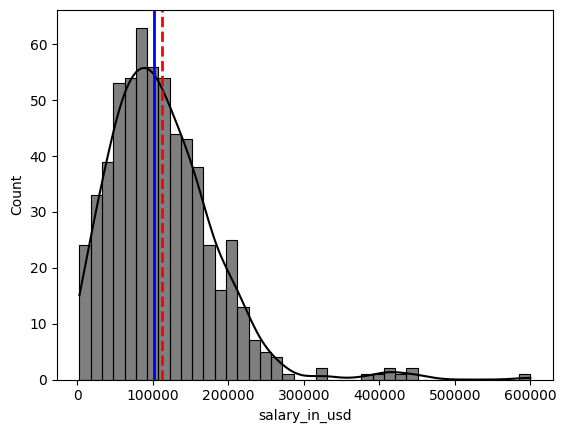

In [64]:
sns.histplot(df_eda['salary_in_usd'],bins=40,kde=True, color='black')
plt.axvline(df_eda['salary_in_usd'].median(), color='blue', linestyle='-', linewidth=2, label='Median')
plt.axvline(df_eda['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')



**Most of salaries are less than 100k dollars per year**

In [65]:
df_eda['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [66]:
df_eda[df_eda['job_title'].str.contains('Data Scientist')]['job_title'].unique()

array(['Data Scientist', 'Lead Data Scientist',
       'Principal Data Scientist', 'Applied Data Scientist',
       'Staff Data Scientist'], dtype=object)

In [67]:
df_eda[df_eda['job_title'].str.contains('Data Analyst')]['job_title'].unique()

array(['Product Data Analyst', 'Data Analyst', 'Business Data Analyst',
       'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst',
       'Financial Data Analyst', 'Finance Data Analyst',
       'Principal Data Analyst'], dtype=object)

In [68]:
df_eda[df_eda['job_title'].str.contains('Machine Learning')]['job_title'].unique()

array(['Machine Learning Scientist', 'Machine Learning Engineer',
       'Machine Learning Manager',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Developer', 'Applied Machine Learning Scientist',
       'Head of Machine Learning', 'Lead Machine Learning Engineer'],
      dtype=object)

In [69]:
df_eda[df_eda['job_title'].str.contains('Data Engineer')]['job_title'].unique()

array(['Big Data Engineer', 'Lead Data Engineer', 'Data Engineer',
       'Data Engineering Manager', 'Cloud Data Engineer',
       'Director of Data Engineering', 'Principal Data Engineer'],
      dtype=object)

In [70]:
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,Onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Hyprid,United Kingdom,Medium
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hyprid,United States,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States,Fully remote,United States,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States,Fully remote,United States,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States,Onsite,United States,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States,Fully remote,United States,Medium


In [71]:
job_domain_map={
    # Data Scientist
    'Data Scientist':'Data Science',
    'Lead Data Scientist':'Data Science',
    'Principal Data Scientist':'Data Science',
    'Applied Data Scientist':'Data Science',
    'Staff Data Scientist':'Data Science',
    'Data Science Manager':'Data Science',
    'Director of Data Science':'Data Science',
    'Data Science Engineer':'Data Science',
    'Head of Data Science':'Data Science',
    'Head of Data':'Data Science',
    'Data Science Consultant':'Data Science',

    #Data Analysis
    'Product Data Analyst':'Data Analysis',
    'Data Analyst':'Data Analysis',
    'Business Data Analyst':'Data Analysis',
    'Lead Data Analyst':'Data Analysis',
    'BI Data Analyst':'Data Analysis',
    'Marketing Data Analyst':'Data Analysis',
    'Financial Data Analyst':'Data Analysis',
    'Finance Data Analyst':'Data Analysis',
    'Principal Data Analyst':'Data Analysis',
    'Data Analytics Manager':'Data Analysis',
    'Analytics Engineer':'Data Analysis',
    'Data Analytics Lead':'Data Analysis',

    #ML engineer
    'ML Engineer': 'Machine Learning',
    'Machine Learning Engineer': 'Machine Learning',
    'Lead Machine Learning Engineer': 'Machine Learning',
    'Applied Machine Learning Scientist': 'Machine Learning',
    'Machine Learning Developer': 'Machine Learning',
    'Machine Learning Scientist': 'Machine Learning',
    'Machine Learning Manager': 'Machine Learning',
    'Head of Machine Learning': 'Machine Learning',
    'Machine Learning Infrastructure Engineer': 'Machine Learning',

    # Data Engineer
    'Data Engineer': 'Data Engineering',
    'Big Data Engineer': 'Data Engineering',
    'Cloud Data Engineer': 'Data Engineering',
    'Lead Data Engineer': 'Data Engineering',
    'Principal Data Engineer': 'Data Engineering',
    'Data Analytics Engineer': 'Data Engineering',
    'Data Science Engineer': 'Data Engineering',
    'ETL Developer': 'Data Engineering',
    'Analytics Engineer': 'Data Engineering',
    'Big Data Architect': 'Data Engineering',
    'Data Architect': 'Data Engineering',
    'Director of Data Engineering': 'Data Engineering',
    'Data Engineering Manager':'Data Engineering',
    
    #Ai Engineer
    'AI Scientist':'AI',
    'Computer Vision Engineer':'AI',
    'NLP Engineer':'AI',
    '3D Computer Vision Researcher':'AI',
    'Computer Vision Software Engineer':'AI',

    #Specialist
    
    'Research Scientist':'Research_Specialist',
    'Data Specialist':'Data_Specialist' 
}
df_eda['job_domain']=df_eda['job_title'].map(job_domain_map)
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_domain
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,Onsite,Germany,Large,Data Science
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Onsite,Japan,Small,Machine Learning
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Hyprid,United Kingdom,Medium,Data Engineering
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Onsite,Honduras,Small,Data Analysis
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hyprid,United States,Large,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States,Fully remote,United States,Medium,Data Engineering
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States,Fully remote,United States,Medium,Data Engineering
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States,Onsite,United States,Medium,Data Analysis
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States,Fully remote,United States,Medium,Data Analysis


In [72]:
job_pos_map={
    # Data Scientist
    'Data Scientist':'Scientist',
    'Lead Data Scientist':'Lead',
    'Principal Data Scientist':'Lead',
    'Applied Data Scientist':'Scientist',
    'Staff Data Scientist':'Scientist',
    'Data Science Manager':'Manager',
    'Director of Data Science':'Director',
    'Data Science Engineer':'Engineer',
    'Head of Data Science':'Manager',
    'Head of Data':'Manager',
    'Data Science Consultant':'Consultant',

    #Data Analysis
    'Product Data Analyst':'Analyst',
    'Data Analyst':'Analyst',
    'Business Data Analyst':'Analyst',
    'Lead Data Analyst':'Lead',
    'BI Data Analyst':'Analyst',
    'Marketing Data Analyst':'Analyst',
    'Financial Data Analyst':'Analyst',
    'Finance Data Analyst':'Analyst',
    'Principal Data Analyst':'Lead',
    'Data Analytics Manager':'Manager',
    'Analytics Engineer':'Engineer',
    'Data Analytics Lead':'Lead',

    #ML engineer
    'ML Engineer': 'Engineer',
    'Machine Learning Engineer': 'Engineer',
    'Lead Machine Learning Engineer': 'Lead',
    'Applied Machine Learning Scientist': 'Scientist',
    'Machine Learning Developer': 'Scientist',
    'Machine Learning Scientist': 'Scientist',
    'Machine Learning Manager': 'Manager',
    'Head of Machine Learning': 'Manager',
    'Machine Learning Infrastructure Engineer': 'Engineer',

    # Data Engineer
    'Data Engineer': 'Engineer',
    'Big Data Engineer': 'Engineer',
    'Cloud Data Engineer': 'Engineer',
    'Lead Data Engineer': 'Lead',
    'Principal Data Engineer': 'Lead',
    'Data Analytics Engineer': 'Engineer',
    'Data Science Engineer': 'Engineer',
    'ETL Developer': 'Engineer',
    'Analytics Engineer': 'Engineer',
    'Big Data Architect': 'Engineer',
    'Data Architect': 'Engineer',
    'Director of Data Engineering': 'Director',
    'Data Engineering Manager':'Manager',
    
    #Ai Engineer
    'AI Scientist':'Engineer',
    'Computer Vision Engineer':'Engineer',
    'NLP Engineer':'Engineer',
    '3D Computer Vision Researcher':'Engineer',
    'Computer Vision Software Engineer':'Engineer',

    #Specialist
    
    'Research Scientist':'Scientist',
    'Data Specialist':'Scientist' 
}
df_eda['job_position']=df_eda['job_title'].map(job_pos_map)
df_eda

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_domain,job_position
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,Onsite,Germany,Large,Data Science,Scientist
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,Onsite,Japan,Small,Machine Learning,Scientist
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,Hyprid,United Kingdom,Medium,Data Engineering,Engineer
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,Onsite,Honduras,Small,Data Analysis,Analyst
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hyprid,United States,Large,Machine Learning,Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States,Fully remote,United States,Medium,Data Engineering,Engineer
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States,Fully remote,United States,Medium,Data Engineering,Engineer
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States,Onsite,United States,Medium,Data Analysis,Analyst
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States,Fully remote,United States,Medium,Data Analysis,Analyst


In [73]:
df_eda.to_excel("Final Final version Data Science Salary6.xlsx", index=False)


In [79]:
df_eda.loc[df_eda['employee_residence']=='Vietnam']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_domain,job_position
132,2021,Mid-Level,Full-time,Applied Machine Learning Scientist,38400,USD,38400,Vietnam,Fully remote,United States,Medium,Machine Learning,Scientist
186,2021,Senior,Full-time,Data Analytics Engineer,50000,USD,50000,Vietnam,Fully remote,United Kingdom,Medium,Data Engineering,Engineer
238,2021,Entry Level,Full-time,Data Scientist,4000,USD,4000,Vietnam,Onsite,Vietnam,Medium,Data Science,Scientist
